Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image
%matplotlib widget

Loading the saved statistics CSV as a dataframe

In [2]:
data = pd.read_csv('data/output_data/the_land_of_the_perumauls/consolidated_footnotes.csv')
data.head()

,page_file,page_number,footnote_text,cluster_label,word_count
0,the_land_of_the_perumauls_page_21.jpg,1,"* Many of the following measurements, and othe...",2,67
1,the_land_of_the_perumauls_page_23.jpg,3,"* Mackenzie Manuscripts, Book No. 3. Counterma...",0,7
2,the_land_of_the_perumauls_page_25.jpg,5,"* In the first eleven years 2,008 in-patients ...",5,28
3,the_land_of_the_perumauls_page_27.jpg,7,"* Dutch Government Records, 1743 : but still, ...",5,26
4,the_land_of_the_perumauls_page_30.jpg,10,"* In the Dutch Records for 1743, it is express...",2,60


Creating a scatter plot of footnotes based on word count (Y-axis) and where in the text it appears (X-axis)

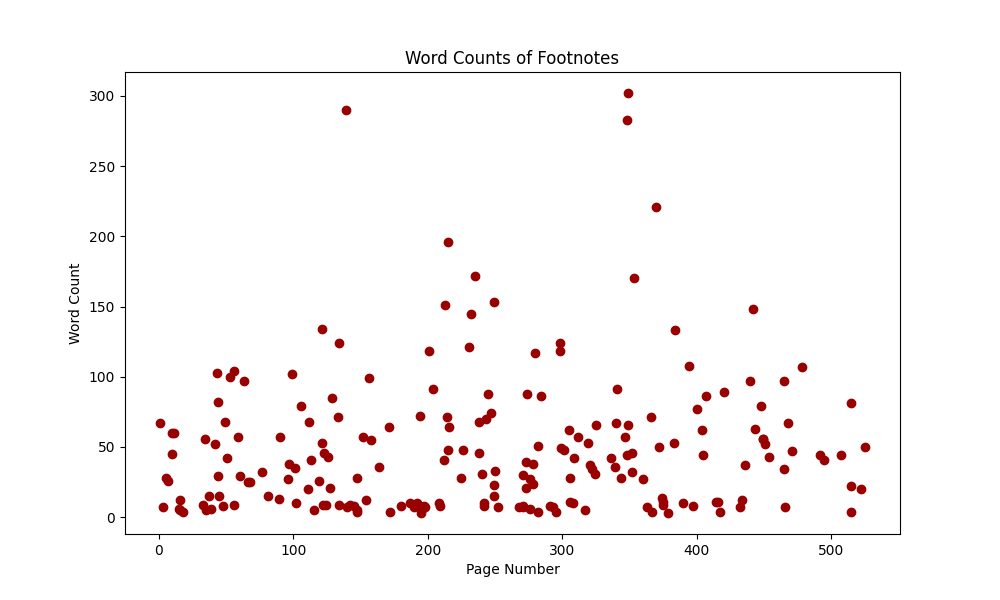

In [4]:
# Create the main figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data['page_number'], data['word_count'], color='#990000', picker=5)  # Enable picking with tolerance
ax.set_xlabel('Page Number')
ax.set_ylabel('Word Count')
ax.set_title('Word Counts of Footnotes')

# Annotation boxes for text and image
text_annotation = None

# Show the text and image content on pick event
def onpick(event):
    global text_annotation
    if len(event.ind) > 0: 
        ind = event.ind[0]
        label = data['footnote_text'].iloc[ind]
        page_file = data['page_file'].iloc[ind]
        img = Image.open(f'data/digital_archives/administrative_archives/the_land_of_the_perumauls/the_land_of_the_perumauls_page_images/{page_file}')

        # Remove existing annotations if they exist
        if text_annotation:
            text_annotation.remove()

        img.show()    

        # Show text label
        text_annotation = plt.figtext(0.2, 0.5, label, wrap=True, horizontalalignment='left', fontsize=8, color="#993404")
        text_annotation.set_bbox(dict(facecolor='#fef0d9', alpha=0.5))

        fig.canvas.draw_idle()

# Connect the pick event to the onpick function
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

Code to create scatter plots for specific data points

In [6]:
# Function to create a new dataframe with footnotes containing a keyword
def create_keyword_dataframe(keyword):
    keyword_df = data[data['footnote_text'].str.contains(keyword, case = False, na=False)]
    print(data['footnote_text'][data['footnote_text'].str.contains(keyword, case = False, na=False)])
    return keyword_df

create_keyword_dataframe('Dutch')

# Function to find common footnotes in two dataframes
def find_common_footnotes(df1, df2):
    common_df = df1[df1['footnote_text'].isin(df2['footnote_text'])]
    common_df['Colour'] = '#5ba300'
    df1 = df1[~df1['footnote_text'].isin(common_df['footnote_text'])]
    df1['Colour'] = '#0073e6'
    df2 = df2[~df2['footnote_text'].isin(common_df['footnote_text'])]
    df2['Colour'] = '#b51963'
    return common_df, df1, df2

0      * Many of the following measurements, and othe...
3      * Dutch Government Records, 1743 : but still, ...
4      * In the Dutch Records for 1743, it is express...
6      * In the Dutch records it is stated that Crang...
7            * Dutch Government Records of Cochin M.S.S.
22     * In 1762, the Rajah of Cochin, mortgaged the ...
28     * The above list, is compiled from one furnish...
45          * Moens' Memorial. Dutch Government records.
46     * Cochin in the Dutch Records, is said to have...
47     * Most of the Dutch Government records of Coch...
48     † The treaties between the Dutch and the Rajah...
50     † The above list of Dutch Governors, with the ...
52     * The European troops maintained in Cochin wer...
53     * Amongst the Dutch records of Cochin, of 1790...
55     * In 1740, October 13th, the Dutch entered int...
56     * This pepper treaty was ever after a source o...
58     * In 1757, Commandant de Jong, addressed some ...
60     * Dutch Government recor

17     * It is very difficult to ascertain anything r...
87     * At Cruzmilagri, midway between Cochin and Ma...
89     * Paoli says, "had they been originally Indian...
91     † During the seventh century, the Moplahs oppr...
96     * About this time the Roman Catholics of Calic...
100    * The Dutch never had the protectorate over th...
109    * In 1803, three thousand star pagodas were gi...
Name: footnote_text, dtype: object
113    † The three mystical letters AUM are said to m...
145    * The census of these places, was taken by ord...
146    * It is curious that it has been asserted, and...
147    * The Jews of Cochin, do not appear to have st...
148    * The Rev. C. Buchanan, states that the origin...
149    * Although the Black Jews perform their own re...
150    * The observer acquainted with the cause of th...
151    * Women are not a portion of the congregation,...
152    † The Rev. J. Roberts, (Journal Royal Asiatie ...
153    * In the Romo-Syrian church at Shallacooddee, 

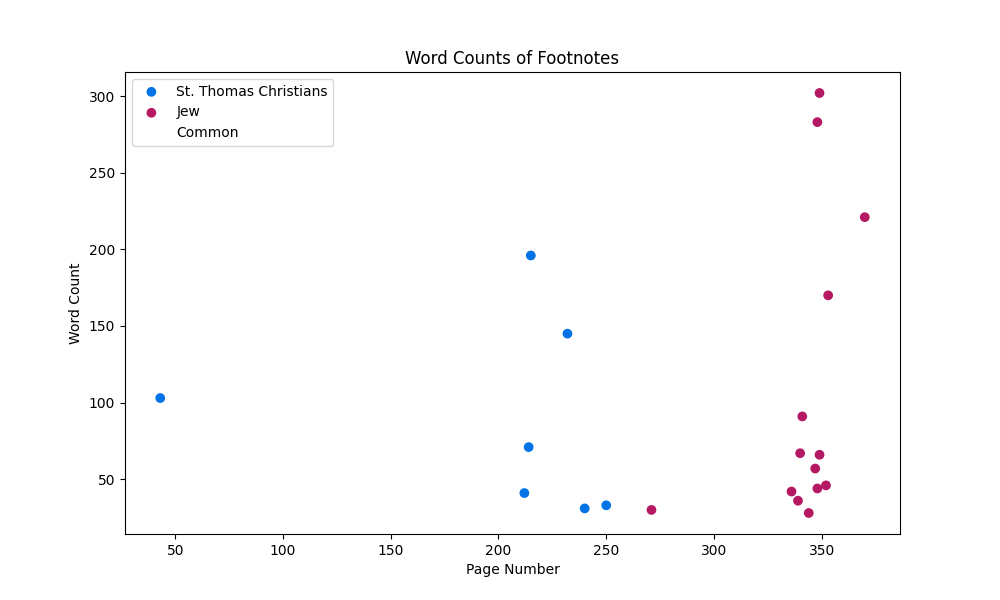

In [8]:
thomas_df = create_keyword_dataframe('Thomas')
jew_df = create_keyword_dataframe('Jew')
common_df, thomas_df, jew_df = find_common_footnotes(thomas_df, jew_df)
final_df = pd.concat([thomas_df, jew_df, common_df])

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(thomas_df['page_number'], thomas_df['word_count'], c=thomas_df['Colour'], label='St. Thomas Christians', picker=5)
scatter = ax.scatter(jew_df['page_number'], jew_df['word_count'], c=jew_df['Colour'], label='Jew', picker=5)
scatter = ax.scatter(common_df['page_number'], common_df['word_count'], c=common_df['Colour'], label='Common', picker=5)
ax.set_xlabel('Page Number')
ax.set_ylabel('Word Count')
ax.set_title('Word Counts of Footnotes')
ax.legend()

# Annotation boxes for text and image
text_annotation = None

# Show the text and image content on pick event
def onpick(event):
    global text_annotation
    if len(event.ind) > 0: 
        ind = event.ind[0]
        label = data['footnote_text'].iloc[ind]
        page_file = data['page_file'].iloc[ind]
        img = Image.open(f'data/digital_archives/administrative_archives/the_land_of_the_perumauls/the_land_of_the_perumauls_page_images/{page_file}')

        # Remove existing annotations if they exist
        if text_annotation:
            text_annotation.remove()

        img.show()    

        # Show text label
        text_annotation = plt.figtext(0.2, 0.5, label, wrap=True, horizontalalignment='left', fontsize=8, color="#993404")
        text_annotation.set_bbox(dict(facecolor='#fef0d9', alpha=0.5))

        fig.canvas.draw_idle()

# Connect the pick event to the onpick function
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()